In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,2,130,230,0,1,187,0,2.5,0,0,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 14 columns):
age         304 non-null int64
sex         304 non-null int64
cp          304 non-null int64
trestbps    304 non-null int64
chol        304 non-null int64
fbs         304 non-null int64
restecg     304 non-null int64
thalach     304 non-null int64
exang       304 non-null int64
oldpeak     304 non-null float64
slope       304 non-null int64
ca          304 non-null int64
thal        304 non-null int64
target      304 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,54.233553,0.684211,0.963816,131.536184,246.220395,0.144737,0.529605,149.848684,0.325658,1.036842,1.398026,0.730263,2.315789,0.542763
std,9.144678,0.465596,1.025423,17.505077,51.751317,0.352415,0.525688,23.009471,0.469393,1.161465,0.615635,1.021035,0.607120,0.498989
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.250000,0.000000,1.000000,167.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().values.any()

False

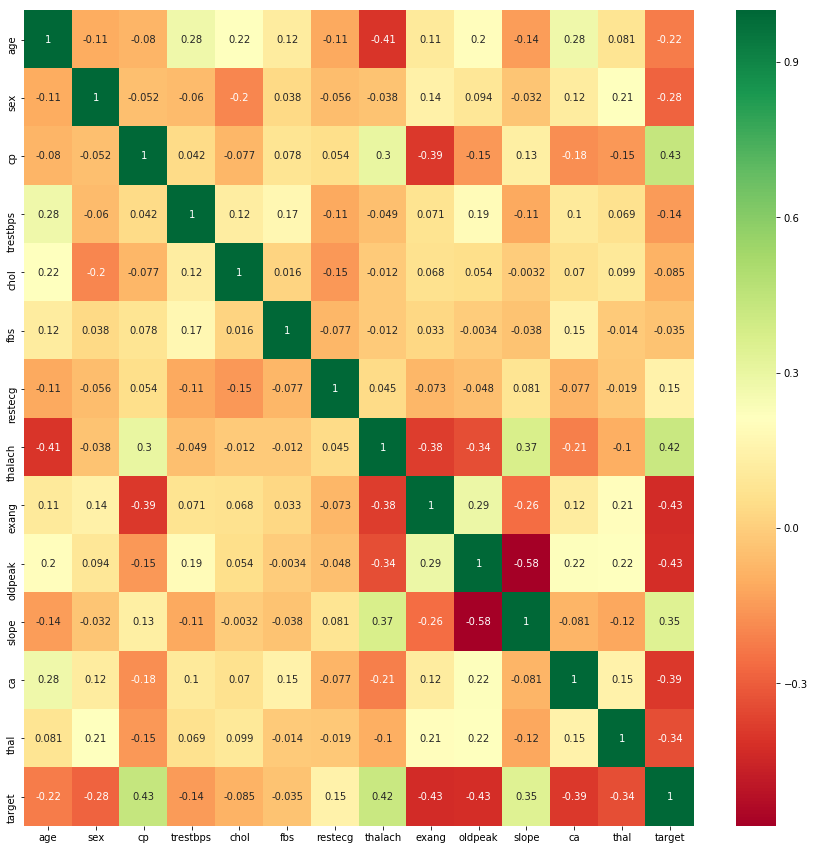

In [6]:
corrmat=df.corr() #correlation of each with other attribute in the dataset
top_corr_features=corrmat.index
plt.figure(figsize=(15,15))
k=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
unique, counts = np.unique(y, return_counts=True)

In [9]:
dict_X = dict(zip(unique, counts))
dict_X

{0: 139, 1: 165}

In [10]:
dataset = {'Target':['True', 'False'],'Count':[165,138]}

In [11]:
da=pd.DataFrame(dataset)

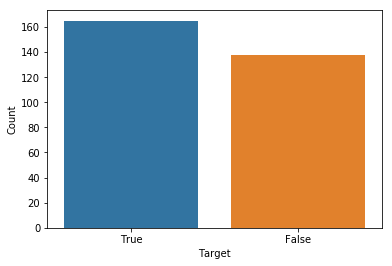

In [12]:
sns.barplot(x='Target',y='Count',data=da)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split  #splitting data on traning and test data and taking 10% test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [14]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train_norm, y_train)

RandomForestClassifier()

In [16]:
y_pred=model.predict(x_test_norm)

In [17]:
model.score(x_test_norm,y_test)   #accuracy in random forest model

0.8709677419354839

In [36]:
pred_prob1 = model.predict_proba(x_test)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_test,y_pred)    #Confusion Matrix

array([[12,  2],
       [ 2, 15]], dtype=int64)

In [20]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=0)
clf=clf.fit(x_train_norm, y_train)

In [21]:
clf.score(x_test_norm,y_test)   #accuracy in Decision Tree model

0.7096774193548387

In [37]:
pred_prob2 = clf.predict_proba(x_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_norm,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
knn.score(x_test_norm,y_test)   # accuracy in KNN Model

0.7419354838709677

In [38]:
pred_prob3 = knn.predict_proba(x_test)

In [41]:
from sklearn.svm import SVC
SVM=SVC(kernel='linear',probability=True)
SVM.fit(x_train_norm,y_train)

SVC(kernel='linear', probability=True)

In [28]:
SVM.score(x_test_norm,y_test) #accuracy in Support Vector machine algorithm

0.8387096774193549

In [42]:
pred_prob5 = SVM.predict_proba(x_test)

In [71]:
model.predict([[50,1,2,160,203,0,1,200,1,0.1,2,0,0]])  #prediction based on random feature values

array([1], dtype=int64)

In [72]:
model.predict([[70,1,2,260,253,0,1,200,1,0.9,0,0,0]])  #prediction based on random feature values

array([1], dtype=int64)

In [73]:
model.predict([[20,1,2,160,103,0,1,100,0,0.6,2,0,2]])  #prediction based on random feature values

array([1], dtype=int64)

In [68]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [69]:
from sklearn.metrics import roc_auc_score
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])

print(auc_score1)
print(auc_score2)
print(auc_score3)
print(auc_score4)
print(auc_score5)

0.8550420168067226
0.7394957983193277
0.5735294117647058
0.5
0.5588235294117647


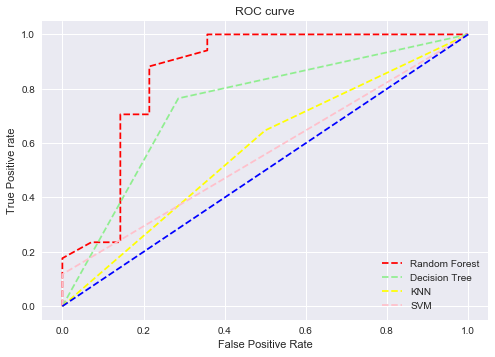

In [74]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='lightgreen', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();